In [1]:
run src/preprocessing.py

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from tqdm import tqdm 
from time import time

In [4]:
def sample_training_set(X_train, y_train, n_pcnt):
    n = X_train.shape[0]*n_pcnt//100
    return n, X_train[:n], y_train[:n]

def time_function_call(function_call):
    start = time()
    result = function_call
    execution_time = time() - start
    return result, execution_time

def run_model(model, model_name, n_pcnt, data, labels):

    X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=42)

    
    n, X_samp, y_samp = sample_training_set(X_train, y_train, n_pcnt)
    
    _, fit_time = time_function_call(
        model.fit(X_samp, y_samp))
    
    train_pred, train_pred_time = time_function_call(
        model.predict(X_samp))
    
    test_pred, test_pred_time = time_function_call(
        model.predict(X_test))    
    
    return {
            'model' : model, 
            'model_name' : model_name,
            'n_pcnt' : n_pcnt,
            'n' : n, 
            'rmse_train' : np.sqrt(mean_squared_error(y_samp, train_pred)),
            'rmse_test' : np.sqrt(mean_squared_error(y_test, test_pred)),
            'mae_train' : mean_absolute_error(y_samp, train_pred),
            'mae_test' : mean_absolute_error(y_test, test_pred),
            'r2_train_score' : model.score(X_samp, y_samp),
            'r2_test_score' : model.score(X_test, y_test),
            'fit_time' : fit_time,
            'train_pred_time' : train_pred_time,
            'test_pred_time' : test_pred_time}

## Variable Ranking - by Single Feature $R^2$ Score 

    run_model(model, model_name, n_pcnt, data, labels)

In [5]:
test_scores = []
for feature in dataset_2.columns:
    results = run_model(Lasso(alpha=100), 'variable ranking', 50, 
                        dataset_2[[feature]], target_2)
    test_score = results['r2_test_score']
    if test_score > 0.2:
        test_scores.append({'feature': feature, 'score' : test_score})

In [6]:
results = pd.DataFrame(test_scores).sort_values('score', ascending=False)
results.head(10)

,feature,score
21,PC 1,0.638048
19,GrLivArea,0.439422
15,GarageCars_3,0.396069
3,ExterQual_TA,0.364485
18,FirstFlrSF,0.360362
8,FullBath_1,0.330004
16,YearBuilt,0.291810
5,BsmtQual_Ex,0.284790
11,KitchenQual_TA,0.278830
4,Foundation_PConc,0.276656


In [7]:
test_scores = []
for feature in dataset_4.columns:
    results = run_model(Lasso(), 'variable ranking', 50, dataset_4[[feature]], target_4)
    test_score = results['r2_test_score']
#     if test_score > 0.1:
#         test_scores.append({'feature': feature, 'score' : test_score})
    test_scores.append({'feature': feature, 'score' : test_score})

In [8]:
results = pd.DataFrame(test_scores).sort_values('score', ascending=False)
results.head(10)

,feature,score
382,PC 1,0.529066
12,GrLivArea,0.439198
102,GarageCars_3,0.396864
44,ExterQual_TA,0.364821
9,FirstFlrSF,0.360158
30,FullBath_1,0.330278
2,YearBuilt,0.291891
125,BsmtQual_Ex,0.283994
24,KitchenQual_TA,0.279176
33,Foundation_PConc,0.276741


In [9]:
performant_features = pd.DataFrame()
# performant_features['test_1'] = list(results.head(30).feature.values)
performant_features['test_1'] = list(results.feature.values)
performant_features[:10]

,test_1
0,PC 1
1,GrLivArea
2,GarageCars_3
3,ExterQual_TA
4,FirstFlrSF
5,FullBath_1
6,YearBuilt
7,BsmtQual_Ex
8,KitchenQual_TA
9,Foundation_PConc


In [10]:
import warnings
warnings.simplefilter('ignore')

In [11]:
features_to_test = []
test_results = {}
for i, feature in enumerate(performant_features.test_1):
    features_to_test.append(feature)
    if i < 7: print(features_to_test)
    test_results[feature] = run_model(Lasso(), 'variable ranking', 
                                      100, dataset_4[features_to_test], target_4)

['PC 1']
['PC 1', 'GrLivArea']
['PC 1', 'GrLivArea', 'GarageCars_3']
['PC 1', 'GrLivArea', 'GarageCars_3', 'ExterQual_TA']
['PC 1', 'GrLivArea', 'GarageCars_3', 'ExterQual_TA', 'FirstFlrSF']
['PC 1', 'GrLivArea', 'GarageCars_3', 'ExterQual_TA', 'FirstFlrSF', 'FullBath_1']
['PC 1', 'GrLivArea', 'GarageCars_3', 'ExterQual_TA', 'FirstFlrSF', 'FullBath_1', 'YearBuilt']


In [12]:
test_results = pd.DataFrame(test_results).T
test_results = test_results.loc[pd.Index(features_to_test)]
performant_features['test_1_r2'] = test_results.r2_test_score.values
# test_results

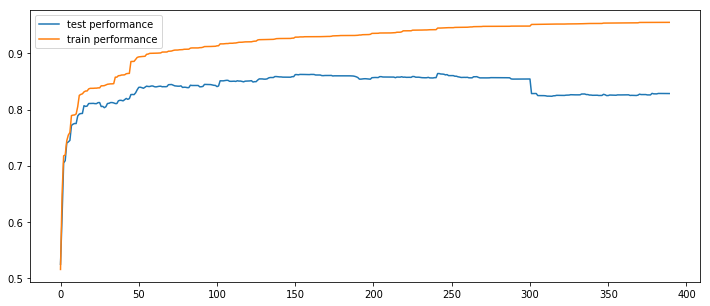

In [13]:
plt.figure(figsize=(12,5))
plt.plot(range(len(features_to_test)), test_results.loc[features_to_test].r2_test_score, label='test performance')
plt.plot(range(len(features_to_test)), test_results.loc[features_to_test].r2_train_score, label='train performance')
plt.legend()

In [14]:
performant_features.shape

(390, 2)

In [15]:
np.argmax(performant_features.test_1_r2)[0]

241

## Variable-Ranking - By Regression Coefficient in Full Model

Fit the full model in order to find the largest coefficients.

In [16]:
results = run_model(Lasso(alpha=100), 'lasso', 100, dataset_2, target_2)

In [17]:
results

{'model': Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False),
 'model_name': 'lasso',
 'n_pcnt': 100,
 'n': 1083,
 'rmse_train': 19977.6150004799,
 'rmse_test': 26760.936480303742,
 'mae_train': 13913.973139890746,
 'mae_test': 16624.58443197135,
 'r2_train_score': 0.9385309511565441,
 'r2_test_score': 0.8712245246251071,
 'fit_time': 0.0,
 'train_pred_time': 0.0,
 'test_pred_time': 0.0}

In [18]:
lasso_model = results['model']

In [19]:
type(lasso_model)

sklearn.linear_model.coordinate_descent.Lasso

In [20]:
lasso_model.intercept_

142571.93126238592

In [21]:
coefficients = lasso_model.coef_
features = dataset_2.columns

In [22]:
coefficients[:5]

array([-0.,  0.,  0.,  0., -0.])

In [23]:
features[:5]

Index(['MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50'],
      dtype='object')

In [24]:
coefficients = pd.Series(coefficients.T.ravel(), index=features)
coefficients.head()

MSSubClass_20   -0.0
MSSubClass_30    0.0
MSSubClass_40    0.0
MSSubClass_45    0.0
MSSubClass_50   -0.0
dtype: float64

In [27]:
sorted_coefs = np.abs(coefficients).sort_values(ascending=False)
sorted_coefs.head(20)

OverallQual_10          96970.557761
FullBath_3              45785.565068
OverallQual_9           43239.508517
RoofMatl_WdShngl        39105.394515
TotRmsAbvGrd_12         31468.861231
Neighborhood_NoRidge    31182.748983
KitchenQual_Ex          24809.397450
Neighborhood_Crawfor    21986.258935
OverallQual_8           20237.991158
GrLivArea               19029.672578
Exterior1st_BrkFace     18821.173407
Neighborhood_StoneBr    17936.771663
BsmtQual_Ex             17047.101077
BsmtExposure_Gd         15744.271572
Functional_Typ          14675.945206
OverallCond_3           14206.596940
KitchenAbvGr_1          12417.536064
TotRmsAbvGrd_10         11924.007363
GarageCars_3             9900.953481
GarageType_2Types        9746.693123
dtype: float64

In [28]:
performant_features.shape

(390, 2)

In [29]:
sorted_coefs.shape

(390,)

In [30]:
performant_features['test_2'] = list(list(sorted_coefs.index))
performant_features[:10]

,test_1,test_1_r2,test_2
0,PC 1,0.524411,OverallQual_10
1,GrLivArea,0.609907,FullBath_3
2,GarageCars_3,0.704973,OverallQual_9
3,ExterQual_TA,0.708974,RoofMatl_WdShngl
4,FirstFlrSF,0.74056,TotRmsAbvGrd_12
5,FullBath_1,0.742397,Neighborhood_NoRidge
6,YearBuilt,0.745128,KitchenQual_Ex
7,BsmtQual_Ex,0.771795,Neighborhood_Crawfor
8,KitchenQual_TA,0.774039,OverallQual_8
9,Foundation_PConc,0.775191,GrLivArea


In [31]:
features_to_test = []
test_results = {}
for feature in performant_features.test_2:
    features_to_test.append(feature)
#     print(dataset_2[features_to_test].shape)
    test_results[feature] = run_model(Lasso(alpha=100), 'lasso', 100,
                                      dataset_2[features_to_test],
                                      target_2)

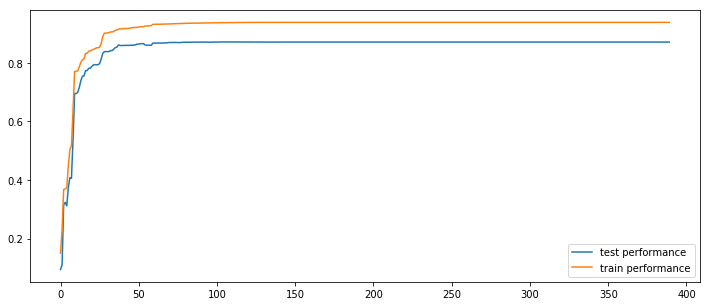

In [35]:
test_results = pd.DataFrame(test_results).T
test_results = test_results.loc[features_to_test]
performant_features['test_2_r2'] = test_results.r2_test_score.values

plt.figure(figsize=(12,5))
plt.plot(range(len(features_to_test)), test_results.r2_test_score, label='test performance')
plt.plot(range(len(features_to_test)), test_results.r2_train_score, label='train performance')
plt.legend()

In [33]:
performant_features

,test_1,test_1_r2,test_2,test_2_r2
0,PC 1,0.524411,OverallQual_10,0.0947046
1,GrLivArea,0.609907,FullBath_3,0.109537
2,GarageCars_3,0.704973,OverallQual_9,0.314819
3,ExterQual_TA,0.708974,RoofMatl_WdShngl,0.323926
4,FirstFlrSF,0.74056,TotRmsAbvGrd_12,0.311868
5,FullBath_1,0.742397,Neighborhood_NoRidge,0.375082
6,YearBuilt,0.745128,KitchenQual_Ex,0.407884
7,BsmtQual_Ex,0.771795,Neighborhood_Crawfor,0.405762
8,KitchenQual_TA,0.774039,OverallQual_8,0.538098
9,Foundation_PConc,0.775191,GrLivArea,0.695339


### Variable-Ranking - By Information Gain in Full Model

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
simple_dtree_results = run_model(DecisionTreeRegressor(), 'dtree', 100,
                                 dataset_2,
                                 target_2)

In [38]:
simple_dtree_results

{'model': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
 'model_name': 'dtree',
 'n_pcnt': 100,
 'n': 1083,
 'rmse_train': 0.0,
 'rmse_test': 37971.665165056984,
 'mae_train': 0.0,
 'mae_test': 24530.692520775625,
 'r2_train_score': 1.0,
 'r2_test_score': 0.7407314537386138,
 'fit_time': 0.0,
 'train_pred_time': 0.0,
 'test_pred_time': 9.5367431640625e-07}

In [43]:
simple_dtree_results = run_model(DecisionTreeRegressor(), 'dtree', 100,
                                 dataset_1,
                                 target_1)
simple_decision_tree_model = simple_dtree_results['model']
feature_importances = simple_decision_tree_model.feature_importances_
features = dataset_1.columns
feature_importances = (pd.Series(feature_importances.T.ravel(), index=features)
                         .sort_values(ascending=False))
feature_importances.head(20)

GarageCars_3            0.363106
GrLivArea               0.283837
FirstFlrSF              0.045932
BsmtQual_TA             0.042854
ExterQual_TA            0.042260
TotalBsmtSF             0.031747
YearBuilt               0.019204
LotArea                 0.018784
BsmtFinSF1              0.013695
MSSubClass_60           0.012558
BsmtUnfSF               0.007739
GarageArea              0.007273
ScreenPorch             0.007116
SecondFlrSF             0.006496
OpenPorchSF             0.006035
Fireplaces_2            0.005997
GarageCars_2            0.005495
YearRemodAdd            0.004732
KitchenQual_Ex          0.004208
Neighborhood_Crawfor    0.004167
dtype: float64

In [44]:
simple_dtree_results = run_model(DecisionTreeRegressor(), 'dtree', 100,
                                 dataset_2,
                                 target_2)
simple_decision_tree_model = simple_dtree_results['model']
feature_importances = simple_decision_tree_model.feature_importances_
features = dataset_2.columns
feature_importances = (pd.Series(feature_importances.T.ravel(), index=features)
                         .sort_values(ascending=False))
feature_importances.head(20)

PC 1                    0.745787
GrLivArea               0.086724
BsmtQual_Ex             0.020489
BsmtFinSF1              0.015738
GarageArea              0.011565
TotalBsmtSF             0.009504
PC 7                    0.009429
PC 5                    0.007398
FirstFlrSF              0.006947
PC 4                    0.006216
KitchenQual_TA          0.005936
LotArea                 0.005024
Neighborhood_Crawfor    0.004072
OverallQual_9           0.003332
YrSold                  0.003036
BsmtUnfSF               0.003015
BsmtFinSF2              0.002890
PC 2                    0.002535
SecondFlrSF             0.002317
BsmtExposure_Gd         0.002276
dtype: float64

In [45]:
feature_importances.shape

(390,)

In [46]:
performant_features['test_3'] = feature_importances.index

In [48]:
performant_features[:10]

,test_1,test_1_r2,test_2,test_2_r2,test_3
0,PC 1,0.524411,OverallQual_10,0.0947046,PC 1
1,GrLivArea,0.609907,FullBath_3,0.109537,GrLivArea
2,GarageCars_3,0.704973,OverallQual_9,0.314819,BsmtQual_Ex
3,ExterQual_TA,0.708974,RoofMatl_WdShngl,0.323926,BsmtFinSF1
4,FirstFlrSF,0.74056,TotRmsAbvGrd_12,0.311868,GarageArea
5,FullBath_1,0.742397,Neighborhood_NoRidge,0.375082,TotalBsmtSF
6,YearBuilt,0.745128,KitchenQual_Ex,0.407884,PC 7
7,BsmtQual_Ex,0.771795,Neighborhood_Crawfor,0.405762,PC 5
8,KitchenQual_TA,0.774039,OverallQual_8,0.538098,FirstFlrSF
9,Foundation_PConc,0.775191,GrLivArea,0.695339,PC 4


In [49]:
features_to_test = []
test_results = {}
for feature in performant_features.test_3:
    features_to_test.append(feature)
    test_results[feature] = run_model(DecisionTreeRegressor(), 'dtree', 100,
                                      dataset_2[features_to_test],
                                      target_2)

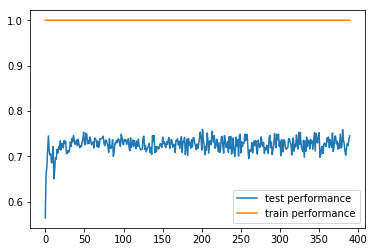

In [50]:
test_results = pd.DataFrame(test_results).T
test_results = test_results.loc[features_to_test]
performant_features['test_3_r2_dtree'] = test_results.r2_test_score.values

plt.plot(range(len(features_to_test)), test_results.r2_test_score, label='test performance')
plt.plot(range(len(features_to_test)), test_results.r2_train_score, label='train performance')
plt.legend()

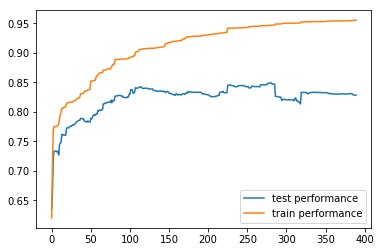

In [51]:
features_to_test = []
test_results = {}
for feature in performant_features.test_3:
    features_to_test.append(feature)
    test_results[feature] = run_model(Lasso(), 'lasso', 100,
                                      dataset_2[features_to_test],
                                      target_2)

test_results = pd.DataFrame(test_results).T
test_results = test_results.loc[features_to_test]
performant_features['test_3_r2_lasso'] = test_results.r2_test_score.values

plt.plot(range(len(features_to_test)), test_results.r2_test_score, label='test performance')
plt.plot(range(len(features_to_test)), test_results.r2_train_score, label='train performance')
plt.legend()    

In [97]:
performant_features.max()

test_1               YrSold
test_1_r2          0.864218
test_2               YrSold
test_2_r2          0.871933
test_3               YrSold
test_3_r2_dtree    0.759545
test_3_r2_lasso    0.849053
dtype: object

In [58]:
performant_features[:20]

,test_1,test_1_r2,test_2,test_2_r2,test_3,test_3_r2_dtree,test_3_r2_lasso
0,PC 1,0.524411,OverallQual_10,0.0947046,PC 1,0.564312,0.63554
1,GrLivArea,0.609907,FullBath_3,0.109537,GrLivArea,0.660362,0.662442
2,GarageCars_3,0.704973,OverallQual_9,0.314819,BsmtQual_Ex,0.675531,0.721864
3,ExterQual_TA,0.708974,RoofMatl_WdShngl,0.323926,BsmtFinSF1,0.714641,0.733308
4,FirstFlrSF,0.74056,TotRmsAbvGrd_12,0.311868,GarageArea,0.74517,0.733342
5,FullBath_1,0.742397,Neighborhood_NoRidge,0.375082,TotalBsmtSF,0.712085,0.733343
6,YearBuilt,0.745128,KitchenQual_Ex,0.407884,PC 7,0.703075,0.733341
7,BsmtQual_Ex,0.771795,Neighborhood_Crawfor,0.405762,PC 5,0.705515,0.732037
8,KitchenQual_TA,0.774039,OverallQual_8,0.538098,FirstFlrSF,0.685394,0.733402
9,Foundation_PConc,0.775191,GrLivArea,0.695339,PC 4,0.693323,0.727053


In [112]:
feats = [col for col in dataset_2.columns if 'OverallQual' in col]
# feats.remove('OverallQual_4')
# feats.remove('OverallQual_5')
# feats.remove('OverallQual_6')
feats += [col for col in dataset_2.columns if 'PC ' in col]
feats += [col for col in dataset_2.columns if 'ExterQual' in col]
feats += [col for col in dataset_2.columns if 'KitchenQual' in col]
feats += ['GrLivArea', 'GarageCars_3', 'FullBath_1', 
          'Neighborhood_NoRidge', 'Neighborhood_Crawfor',
          'Neighborhood_StoneBr', 'BsmtQual_Ex', 'LotArea', 
          'YearBuilt', 'BsmtFinSF1', 'FireplaceQu_None',
          'RoofMatl_WdShngl', 'FullBath_2']

In [113]:
m = run_model(Lasso(), 'lasso', 100, dataset_2[feats], target_2)
m['r2_test_score']

0.8506205999169973

In [73]:
m = m['model']

In [74]:
m.coef_, m.intercept_

(array([-29525.03044249, -20390.95615834, -52632.85241974, -40782.28129721,
        -37893.97429059, -30188.52870674, -12909.81509847,  18507.72061182,
         75121.72105309, 173448.54326746,  30110.90791847, -29827.28966153,
         11447.37177228,   -692.37032053,  20995.97504861, -12536.10162281,
          6625.90023717,  20662.03987005,   7287.84405998]),
 189851.92405287587)